In [1]:
import os
import numpy as np 
import pandas as pd

import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

import matplotlib.pyplot as plt
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

/homes/smeshkinfamfard/anaconda2/envs/tf14/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/homes/smeshkinfamfard/anaconda2/envs/tf14/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/homes/smeshkinfamfard/anaconda2/envs/tf14/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/homes/smeshkinfamfard

In [2]:
base_dir = os.path.join("OCT/")
print("Base directory --> ", os.listdir(base_dir))

Base directory -->  ['val', 'train', 'test']


In [3]:
# Train set
train_dir = os.path.join(base_dir + "train/")
print("Train --> ", os.listdir(train_dir))

# Test set
test_dir = os.path.join(base_dir +"test/")
print("Test --> ", os.listdir(test_dir))

# Validation set
validation_dir = os.path.join(base_dir +"val/")
print("Validation --> ", os.listdir(validation_dir)[:5])

Train -->  ['DRUSEN', 'CNV', 'DME', 'NORMAL']
Test -->  ['NORMAL', 'DME', 'DRUSEN', 'CNV']
Validation -->  ['DRUSEN', 'DME', 'NORMAL', 'CNV']


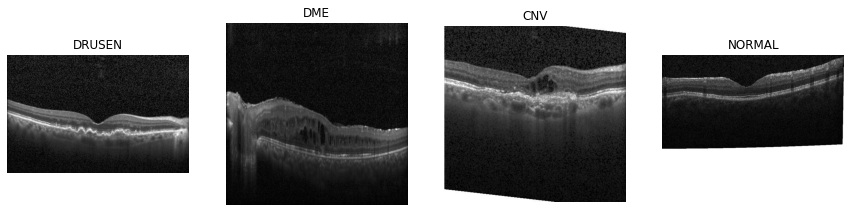

In [4]:
# Displaying random image from the dataset

fig, ax = plt.subplots(1, 4, figsize=(15, 10))

sample_paper = random.choice(os.listdir(train_dir + "DRUSEN"))
image = load_img(train_dir + "DRUSEN/" + sample_paper)
ax[0].imshow(image)
ax[0].set_title("DRUSEN")
ax[0].axis("Off")

sample_rock = random.choice(os.listdir(train_dir + "DME"))
image = load_img(train_dir + "DME/" + sample_rock)
ax[1].imshow(image)
ax[1].set_title("DME")
ax[1].axis("Off")

sample_scissor = random.choice(os.listdir(train_dir + "CNV"))
image = load_img(train_dir + "CNV/" + sample_scissor)
ax[2].imshow(image)
ax[2].set_title("CNV")
ax[2].axis("Off")

sample_scissor = random.choice(os.listdir(train_dir + "NORMAL"))
image = load_img(train_dir + "NORMAL/" + sample_scissor)
ax[3].imshow(image)
ax[3].set_title("NORMAL")
ax[3].axis("Off")

plt.show()

In [5]:
rate = 0.2
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate),
    
    tf.keras.layers.Dense(4, activation='softmax')
])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
dropout (Dropout)            (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
__________

In [7]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])


In [8]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2, # Shifting image width by 20%
      height_shift_range=0.2,# Shifting image height by 20%
      shear_range=0.2,       # Rotation across X-axis by 20%
      zoom_range=0.2,        # Image zooming by 20%
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 100
)

Found 83484 images belonging to 4 classes.


In [9]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)

Found 968 images belonging to 4 classes.


In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch = np.ceil(83484/100),  # 83484 images = batch_size * steps
      epochs = 15,
      validation_data=validation_generator,
      validation_steps = np.ceil(968/20),  # 968 images = batch_size * steps
      verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
835/835 [==============================] - 493s 590ms/step - loss: 0.8426 - acc: 0.6778 - val_loss: 0.7896 - val_acc: 0.6343
Epoch 2/15
835/835 [==============================] - 490s 587ms/step - loss: 0.5878 - acc: 0.7850 - val_loss: 0.4925 - val_acc: 0.7841
Epoch 3/15
835/835 [==============================] - 490s 587ms/step - loss: 0.4553 - acc: 0.8361 - val_loss: 0.2555 - val_acc: 0.9287
Epoch 4/15
835/835 [==============================] - 491s 588ms/step - loss: 0.3766 - acc: 0.8684 - val_loss: 0.2647 - val_acc: 0.9060
Epoch 5/15
835/835 [==============================] - 489s 586ms/step - loss: 0.3445 - acc: 0.8808 - val_loss: 0.1865 - val_acc: 0.9432
Epoch 6/15
835/835 [==============================] - 490s 587ms/step - loss: 0.3193 - acc: 0.8890 - val_loss: 0.1577 - val_acc: 0.9535
Epoch 7/15
835/835 [==============================] - 488s 585ms/step - loss: 0.3014 - acc: 0.8957 - val_loss: 0.1185 - val_acc: 0.9721


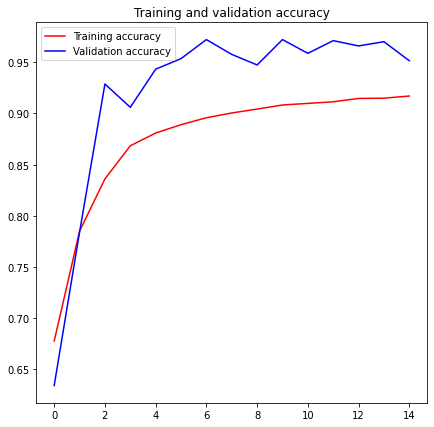

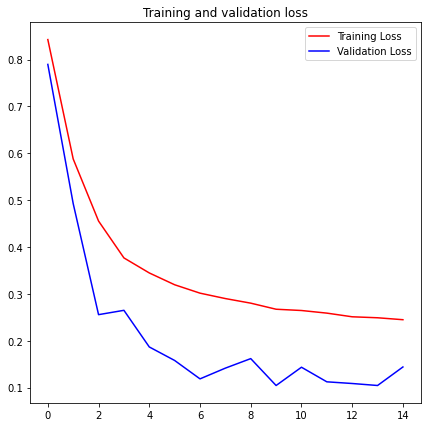

In [11]:
# import pdb;pdb.set_trace()
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,7))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,7))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
model.save('models/model_D02.h5')

In [14]:
model.save_weights('models/model_weights_D02.h5')

In [47]:
import os
import shutil
dest = "/Kaggle/test-image"
for i in ['NORMAL', 'DME', 'DRUSEN', 'CNV']:
    src = os.path.join(validation_dir, i)
    src_files = os.listdir(src)
    for file_name in src_files:
        if(file_name != ".DS_Store"):
            full_file_name = os.path.join(src, file_name)
            if os.path.isfile(full_file_name):
                shutil.copy(full_file_name, dest)

In [17]:
dest = "Kaggle/test-image"
len(os.listdir(dest))

32

In [18]:
test_img = os.listdir(dest)

test_df = pd.DataFrame({'Image': test_img})
test_df.head()

,Image
0,DRUSEN-9837663-1.jpeg
1,NORMAL-5324912-1.jpeg
2,DME-9583225-1.jpeg
3,DRUSEN-9884539-1.jpeg
4,NORMAL-4872585-1.jpeg


In [19]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    dest, 
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (150, 150),
    batch_size = 20,
    shuffle = False
)

Found 32 validated image filenames.


In [20]:
predict = model.predict_generator(test_generator, steps = int(np.ceil(32/20)))

In [21]:
# Identifying the classes

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
label_map

{0: 'CNV', 1: 'DME', 2: 'DRUSEN', 3: 'NORMAL'}

In [22]:
test_df['Label'] = np.argmax(predict, axis = -1)

test_df['Label'] = test_df['Label'].replace(label_map)

In [23]:
test_df.head()

,Image,Label
0,DRUSEN-9837663-1.jpeg,DRUSEN
1,NORMAL-5324912-1.jpeg,NORMAL
2,DME-9583225-1.jpeg,DME
3,DRUSEN-9884539-1.jpeg,DRUSEN
4,NORMAL-4872585-1.jpeg,NORMAL


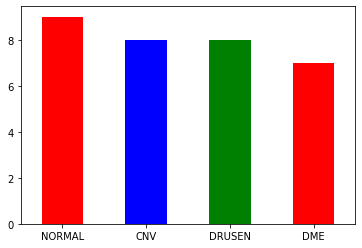

In [24]:
test_df.Label.value_counts().plot.bar(color = ['red','blue','green'])
plt.xticks(rotation = 0)
plt.show()

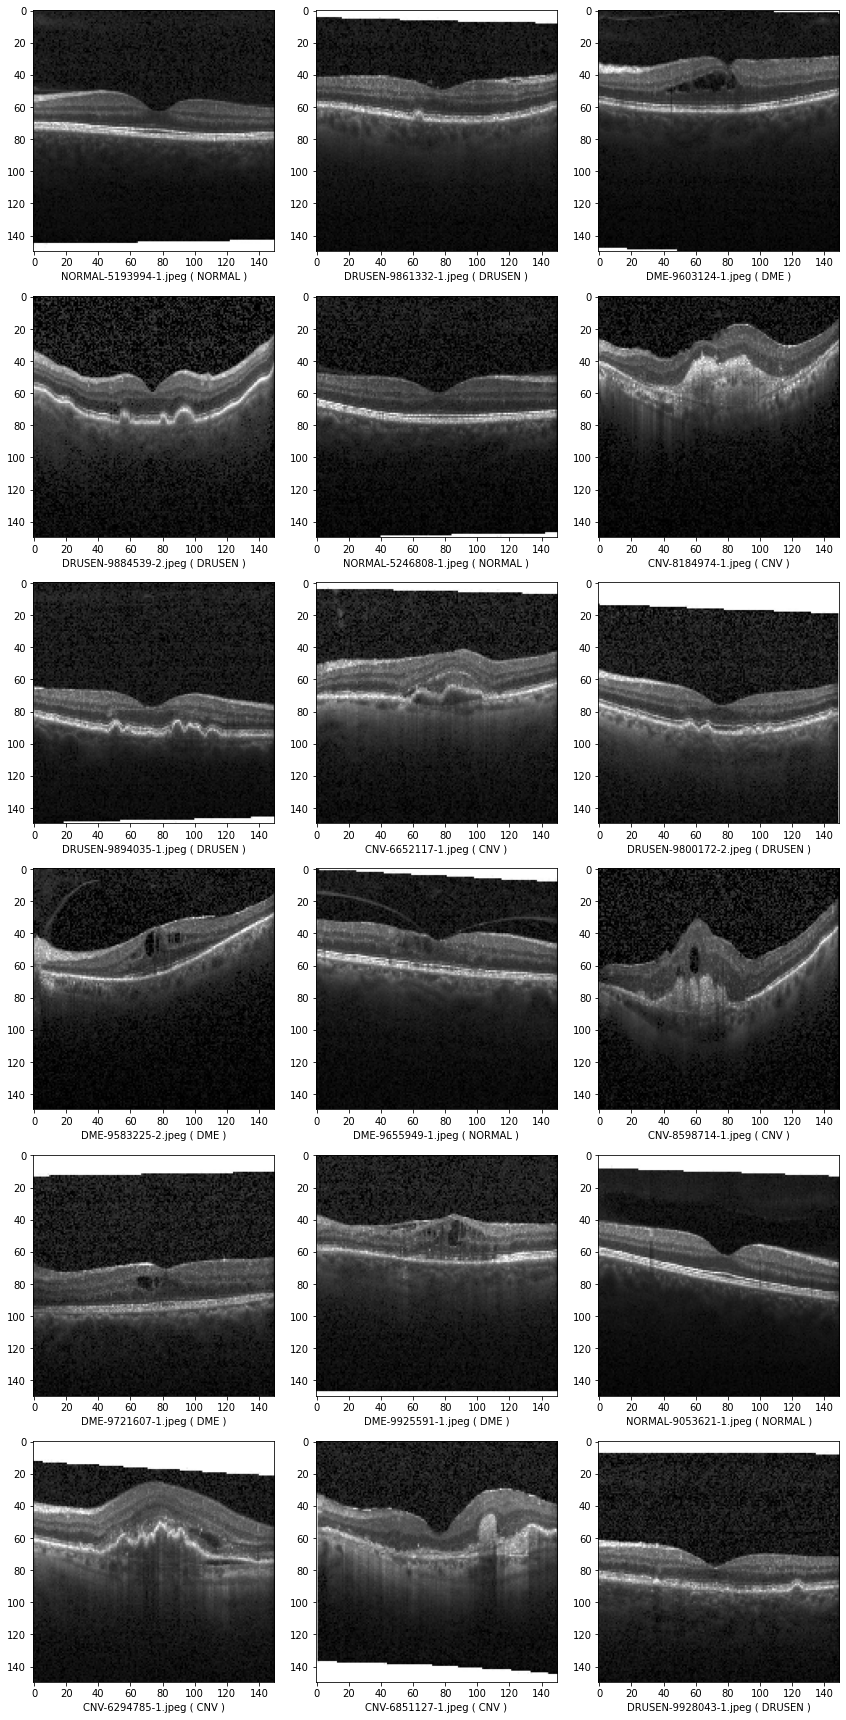

In [25]:
v = random.randint(0, 24)

sample_test = test_df.iloc[v:(v+18)].reset_index(drop = True)
sample_test.head()

plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Image']
    category = row['Label']
    img = load_img(dest +"/" + filename, target_size = (150, 150))
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + ' ( ' + "{}".format(category) + ' )' )
plt.tight_layout()
plt.show()

In [26]:
lis = []
for ind in test_df.index: 
    if(test_df['Label'][ind] in test_df['Image'][ind]):
        lis.append(1)
    else:
        lis.append(0)
print("Accuracy of the model on test data is {:.2f}%".format((sum(lis)/len(lis))*100))

Accuracy of the model on test data is 96.88%


In [38]:
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras import backend as K

import cv2
from glob import glob
import numpy
paths = glob('Disease1/*')
batch = []

    

model = load_model('models/model_D05.h5')


f = K.function([model.layers[0].input, K.learning_phase()],
               [model.layers[-1].output])
 

def predict_with_uncertainty(f, x, n_iter=10):
    result = []

    for iter in range(n_iter):
#         import pdb;pdb.set_trace()
        result.append(f([x, 1]))
        
    result = numpy.array(result)
    prediction = result.mean(axis=0)
    uncertainty = result.var(axis=0)
    print(prediction, uncertainty)
    return prediction, uncertainty
stat = [('name', 'prediction', 'uncertainty')]
for path in paths:
    img = cv2.imread(path)
    img = cv2.resize(img, (150 ,150))
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction, uncertainty = predict_with_uncertainty(f, img, 100)
    stat.append((path, prediction, uncertainty))
    
    
print(stat)

[[[0.76683855 0.06188975 0.00417386 0.16709785]]] [[[4.9751226e-02 3.0033351e-03 6.9464513e-05 3.6381055e-02]]]
[[[0.7019021  0.26555255 0.00195764 0.03058767]]] [[[4.4787116e-02 3.8302392e-02 9.6754356e-06 2.2609234e-03]]]
[[[0.50307363 0.48880145 0.00082959 0.00729538]]] [[[8.0950849e-02 7.9189509e-02 7.4803993e-06 4.4090967e-04]]]
[[[9.8595965e-01 8.0960607e-03 2.5500788e-04 5.6897020e-03]]] [[[9.7487489e-04 3.8930363e-04 1.5801019e-06 3.0013663e-04]]]
[[[5.6556422e-01 4.3011886e-01 2.7923481e-04 4.0378133e-03]]] [[[9.0750113e-02 9.0529636e-02 7.0029580e-07 1.5511771e-04]]]
[[[0.58782023 0.30785814 0.00387609 0.10044573]]] [[[4.3139149e-02 3.3091124e-02 2.6591304e-05 1.0792086e-02]]]
[[[9.8577046e-01 1.2379256e-02 2.2855477e-04 1.6217764e-03]]] [[[5.1135075e-04 4.1139431e-04 2.5950666e-07 1.6291184e-05]]]
[[[8.9792967e-01 9.9698111e-02 3.4416077e-04 2.0281712e-03]]] [[[1.1539228e-02 1.1211503e-02 5.0715369e-07 1.1204644e-05]]]
[[[3.2521108e-01 6.7473215e-01 4.3344815e-05 1.3613330e-